In [33]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

# input data
plt.style.use("../data/inputs/ploting.mplstyle")
results_dir = Path("../data/results/MULTI-STATIONS -- 20251223_042417 -- ed4d/HAMILTON RBG CS - 6153301")

# Load Data

In [34]:
bootstrap = pd.read_csv(results_dir / "03_sensitivity__uncertainty_analysis/01_bootstrap_uncertainty.csv")
sensitivity = pd.read_csv(results_dir / "03_sensitivity__uncertainty_analysis/02_sensitivity_analysis.csv")
print("Data loaded successfully.")
display(bootstrap)

Data loaded successfully.


,iteration,copula_type,parameter,RP_2,RP_5,RP_10,RP_25,RP_50,RP_100
0,1,Gaussian,0.817051,20.191272,25.053963,28.761506,33.664648,37.378239,41.093912
1,1,t,0.814455,20.202622,25.079712,28.793789,33.698650,37.398951,41.127176
2,1,Clayton,3.372347,20.950576,25.864465,29.579881,34.489177,38.203473,41.935720
3,1,Frank,8.512492,20.621058,25.519849,29.217362,34.140934,37.870751,41.582709
4,1,Gumbel,2.297843,20.131755,25.027835,28.747703,33.657706,37.355126,41.086884
...,...,...,...,...,...,...,...,...,...
995,200,Gaussian,0.822162,19.617181,24.341804,27.961946,32.757043,36.368164,40.015824
996,200,t,0.823127,19.616810,24.354508,27.974903,32.765196,36.373259,40.013074
997,200,Clayton,3.459249,20.355526,25.142739,28.791079,33.588414,37.210140,40.858161
998,200,Frank,8.936736,20.002418,24.800384,28.418942,33.211324,36.861435,40.481565


# Bootstrap Uncertainty Analysis

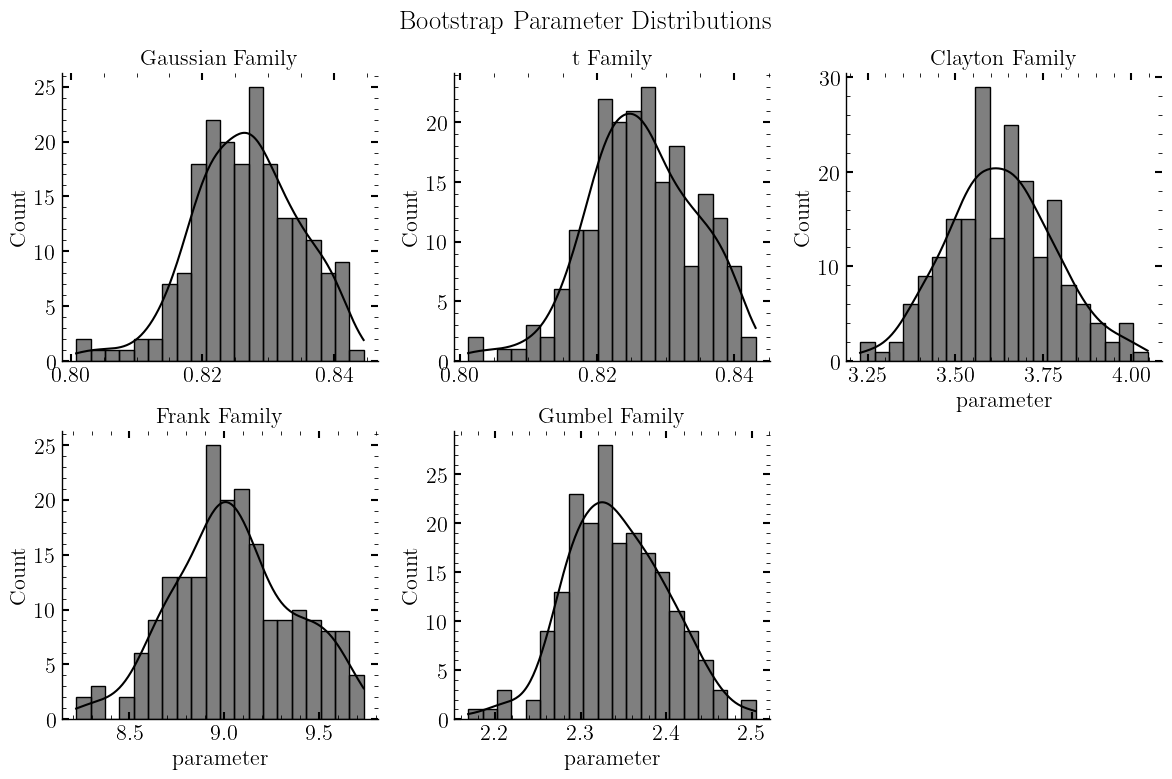

In [35]:
"""
Plotting bootstrap parameter distrebution
"""
# Create a FacetGrid allows each plot to have its own scale (sharex=False)
g = sns.FacetGrid(bootstrap, col="copula_type", col_wrap=3, sharex=False, sharey=False, height=4)

# Map a histogram or KDE (Kernel Density Estimate) to show distribution shape
g.map(sns.histplot, "parameter", kde=True, bins=20)

g.set_titles("{col_name} Family")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Bootstrap Parameter Distributions')
# plt.savefig(save_path+"bootstrap_para.pdf", bbox_inches='tight')
plt.show()

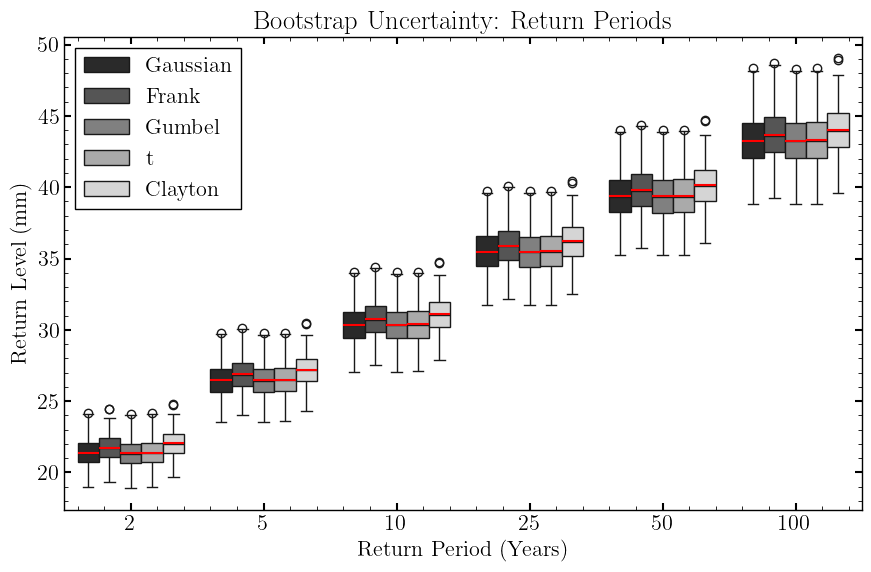

In [36]:
"""
Plotting bootstrap return periods distributions
"""
# Melt the DataFrame to long format for plotting return levels
rp_cols = [col for col in bootstrap.columns if col.startswith('RP_')]
df_melted = bootstrap.melt(
    id_vars=['iteration', 'copula_type'], 
    value_vars=rp_cols, 
    var_name='Return_Period', 
    value_name='Return_Level'
)

# Convert Return_Period to numeric for proper sorting (e.g., "RP_2" -> 2)
df_melted['Return_Period_Num'] = df_melted['Return_Period'].str.replace('RP_', '').astype(int)
df_melted = df_melted.sort_values('Return_Period_Num')

plt.figure(figsize=(9, 6))
sns.boxplot(
    data=df_melted, 
    x='Return_Period_Num', 
    y='Return_Level', 
    hue='copula_type', 
    palette="grey",
    showmeans=True,       # Enable the mean
    meanline=True,        # Make the mean a line instead of a point
    meanprops={
        'color': 'red',   # Set mean line to red
        'linewidth': 1.5, # Make it thick enough to see clearly
        'linestyle': '-'  # Solid line
    }
)
plt.xlabel('Return Period (Years)')
plt.ylabel('Return Level (mm)')
plt.legend()


plt.title('Bootstrap Uncertainty: Return Periods')
plt.tight_layout()
# plt.savefig(save_path+"bootstrap_RT.pdf", bbox_inches='tight')
plt.show()


In [37]:
import numpy as np

# Create a copy to avoid SettingWithCopy warnings
df_tau = df.copy()

# 1. Gaussian & t: tau = (2/pi) * arcsin(rho)
df_tau.loc[df_tau['copula_type'].isin(['Gaussian', 't']), 'tau'] = \
    (2 / np.pi) * np.arcsin(df_tau.loc[df_tau['copula_type'].isin(['Gaussian', 't']), 'parameter'])

# 2. Gumbel: tau = 1 - 1/theta
df_tau.loc[df_tau['copula_type'] == 'Gumbel', 'tau'] = \
    1 - (1 / df_tau.loc[df_tau['copula_type'] == 'Gumbel', 'parameter'])

# 3. Clayton: tau = theta / (theta + 2)
df_tau.loc[df_tau['copula_type'] == 'Clayton', 'tau'] = \
    df_tau.loc[df_tau['copula_type'] == 'Clayton', 'parameter'] / \
    (df_tau.loc[df_tau['copula_type'] == 'Clayton', 'parameter'] + 2)

# 4. Frank: (Approximation is complex, but for plotting, many skip it or use a library func)
# For now, let's plot the ones we have converted:

plt.figure(figsize=(9, 6))
sns.boxplot(data=df_tau[df_tau['copula_type'] != 'Frank'], x='copula_type', y='tau', hue="copula_type", palette="gray",
    showmeans=True,       # Enable the mean
    meanline=True,        # Make the mean a line instead of a point
    meanprops={
        'color': 'red',   # Set mean line to red
        'linewidth': 1.5, # Make it thick enough to see clearly
        'linestyle': '-'  # Solid line
    })
# plt.title('Dependence Strength (Kendall\'s Tau)')
plt.xlabel('Copula')
plt.ylabel('Kendall\'s Tau')
plt.savefig(save_path+"bootstrap_tau.pdf", bbox_inches='tight')
plt.show()

NameError: name 'df' is not defined

# Sensitivity Analysis Plotting

In [26]:
sensitivity

,ReturnPeriod,Gaussian_param_0.10,Gaussian_param_0.20,Gaussian_param_0.30,Gaussian_param_0.40,Gaussian_param_0.50,Gaussian_param_0.60,Gaussian_param_0.70,Gaussian_param_0.80,Gaussian_param_0.90,...,Frank_param_8.00,Frank_param_9.00,Gumbel_param_1.50,Gumbel_param_2.00,Gumbel_param_2.50,Gumbel_param_3.00,Gumbel_param_3.50,Gumbel_param_4.00,Gumbel_param_4.50,Gumbel_param_5.00
0,2.0,22.932169,22.739457,22.528803,22.300809,22.079101,21.868778,21.659000,21.469850,21.346864,...,21.843807,21.777292,21.738386,21.427040,21.352804,21.334870,21.330213,21.329307,21.328828,21.328972
1,5.0,28.055672,27.837655,27.599087,27.342560,27.104085,26.887585,26.693069,26.550723,26.491122,...,26.980026,26.914413,26.750563,26.526377,26.493790,26.488729,26.488068,26.487963,26.488002,26.488030
2,10.0,31.942371,31.697502,31.429930,31.164238,30.929016,30.706828,30.524469,30.411606,30.379417,...,30.878112,30.810773,30.571255,30.396907,30.380044,30.378246,30.378175,30.378201,30.378417,30.378304
3,25.0,37.069238,36.803097,36.511405,36.219896,35.986690,35.775905,35.625134,35.549084,35.538381,...,36.025513,35.959420,35.657472,35.544221,35.536379,35.536813,35.536702,35.537059,35.537587,35.537820
4,50.0,40.954730,40.663103,40.341234,40.059576,39.825639,39.617317,39.488380,39.437902,39.428117,...,39.926412,39.860416,39.507999,39.429023,39.424636,39.425305,39.423154,39.426319,39.426189,39.426787
5,100.0,44.835013,44.517443,44.197586,43.887557,43.645690,43.464451,43.356942,43.327976,43.322188,...,43.824575,43.755188,43.362706,43.316712,43.316087,43.317485,43.318149,43.318901,43.318395,43.321675


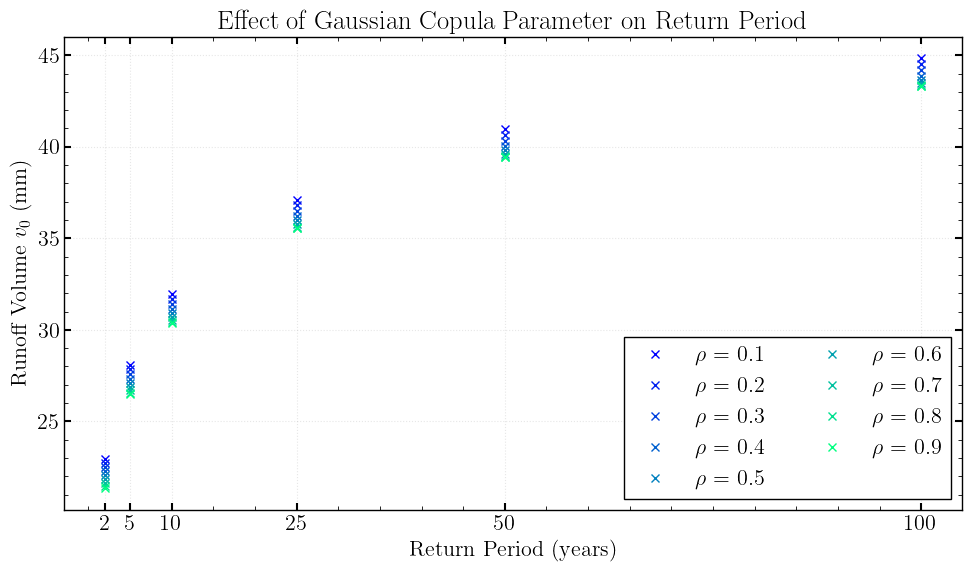

In [ ]:

# Choose which copula to plot (e.g., 'Gaussian', 't', 'Clayton', 'Frank', 'Gumbel')
copula_type = 'Gaussian'

# Extract columns for this copula type
copula_cols = [col for col in sensitivity.columns if col.startswith(f'{copula_type}_param_')]

# Extract parameter values from column names
param_values = [float(col.split('_')[-1]) for col in copula_cols]
param_name = r'\theta' if copula_type in ['Clayton', 'Gumbel'] else r'\rho'  # or 'ρ' for Gaussian/t copulas

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Color gradient from blue to red
colors = plt.cm.winter(np.linspace(0, 1, len(param_values)))

for col, param, color in zip(copula_cols, param_values, colors):
    ax.plot(sensitivity['ReturnPeriod'], sensitivity[col], 'x',
            color=color, linewidth=1.5, 
            label=fr'${param_name}$ = {param}')

ax.set_xlabel('Return Period (years)')
ax.set_ylabel(r'Runoff Volume $v_0$ (mm)') 
# Format x-axis
ax.set_xticks(sensitivity['ReturnPeriod'])
ax.xaxis.set_minor_locator(MultipleLocator(5)) 

ax.legend(ncol=2)
ax.grid(True, linestyle=':', alpha=0.3)

ax.set_title(f'Effect of {copula_type} Copula Parameter on Return Period')
plt.tight_layout()
plt.show()

# Multi-Station Analysis

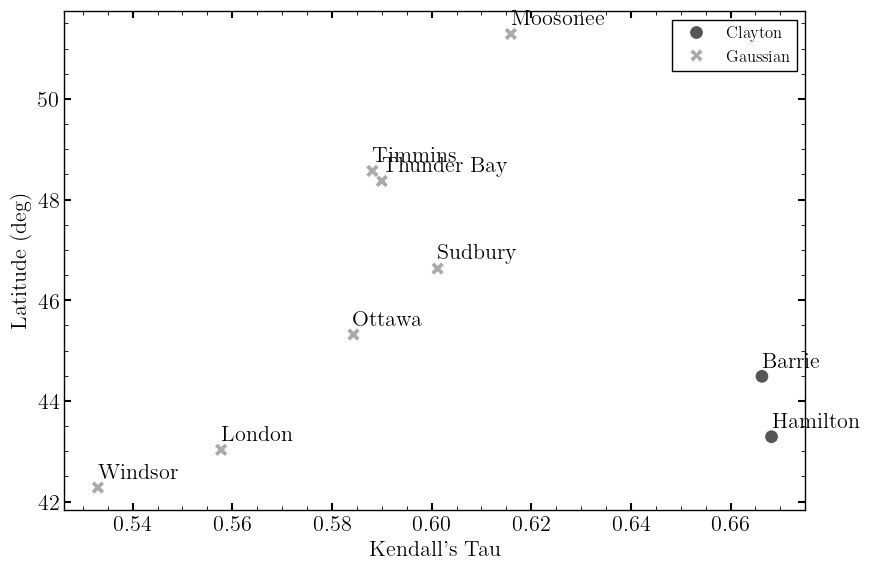

In [57]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Multi-station physical consistency checks
base_dir = Path("/Users/abdelrahmanaltawil/Developer/GitHub/publications-implementation/Dependency Structure of Rainfall Events in Runoff Modeling Using Copulas/data/results/MULTI-STATIONS -- 20251222_005057 -- 22ff")
tau_source = "fitted_best_aic"  # 'fitted_best_aic' or 'empirical'

# Coordinates are approximate city/airport locations; replace with station-accurate values if needed.
station_coords = pd.DataFrame([
    {"station_id": "6153301", "station_name": "HAMILTON RBG CS", "label": "Hamilton", "latitude": 43.29, "longitude": -79.87},
    {"station_id": "6139525", "station_name": "WINDSOR A", "label": "Windsor", "latitude": 42.28, "longitude": -82.96},
    {"station_id": "6144475", "station_name": "LONDON A", "label": "London", "latitude": 43.03, "longitude": -81.15},
    {"station_id": "6106000", "station_name": "OTTAWA MACDONALD-CARTIER INT'L A", "label": "Ottawa", "latitude": 45.32, "longitude": -75.67},
    {"station_id": "6117700", "station_name": "BARRIE-ORO", "label": "Barrie", "latitude": 44.49, "longitude": -79.56},
    {"station_id": "6068150", "station_name": "SUDBURY A", "label": "Sudbury", "latitude": 46.63, "longitude": -80.80},
    {"station_id": "6048261", "station_name": "THUNDER BAY A", "label": "Thunder Bay", "latitude": 48.37, "longitude": -89.32},
    {"station_id": "6078285", "station_name": "TIMMINS VICTOR POWER A", "label": "Timmins", "latitude": 48.57, "longitude": -81.38},
    {"station_id": "6075425", "station_name": "MOOSONEE UA", "label": "Moosonee", "latitude": 51.29, "longitude": -80.61},
])
station_coords = station_coords.set_index("station_id")

station_dirs = sorted([
    p for p in base_dir.iterdir()
    if p.is_dir() and (p / "02_copula_fitting/02_copula_fit_metrics.csv").exists()
])

records = []
missing_coords = []
for station_dir in station_dirs:
    station_name, station_id = station_dir.name.rsplit("-", 1)
    station_name = station_name.strip()
    station_id = station_id.strip()

    metrics_path = station_dir / "02_copula_fitting/02_copula_fit_metrics.csv"
    metrics = pd.read_csv(metrics_path).dropna(subset=["AIC"])
    if metrics.empty:
        continue

    best_row = metrics.loc[metrics["AIC"].idxmin()]
    best_family = best_row["Family"]
    tau_fitted = best_row["tau"]

    if tau_source == "empirical":
        events_path = station_dir / "01_input_data/03_rainfall_events_data.csv"
        events = pd.read_csv(events_path)[["Peak Precipitation (mm)", "Volume (mm)"]].dropna()
        tau = events.corr(method="kendall").iloc[0, 1] if not events.empty else np.nan
    else:
        tau = tau_fitted

    if station_id in station_coords.index:
        coords = station_coords.loc[station_id]
        latitude = coords["latitude"]
        longitude = coords["longitude"]
        label = coords["label"]
    else:
        missing_coords.append(f"{station_name} ({station_id})")
        latitude = np.nan
        longitude = np.nan
        label = station_name

    records.append({
        "station_id": station_id,
        "station_name": station_name,
        "label": label,
        "tau": tau,
        "best_family": best_family,
        "best_aic": best_row["AIC"],
        "latitude": latitude,
        "longitude": longitude,
    })

station_summary = pd.DataFrame(records)

if missing_coords:
    print("Missing coordinates for:".join(missing_coords))

plot_df = station_summary.dropna(subset=["latitude", "longitude"])

# 1) Latitude vs. dependence (Kendall's tau)
plt.figure(figsize=(9, 6))
sns.scatterplot(data=plot_df, x="tau", y="latitude", hue="best_family", style="best_family", palette="grey", s=100)
for _, row in plot_df.iterrows():
    plt.text(row["tau"], row["latitude"]+0.1, row["label"], ha="left", va="bottom")
# plt.title("Latitude vs. Kendall's Tau")
plt.xlabel("Kendall's Tau")
plt.ylabel("Latitude (deg)")
# plt.gca().set_aspect("equal", adjustable="box")
leg = plt.legend(fontsize=12)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)
plt.tight_layout()
# plt.savefig(save_path+"station_tau.pdf", bbox_inches='tight')
plt.show()

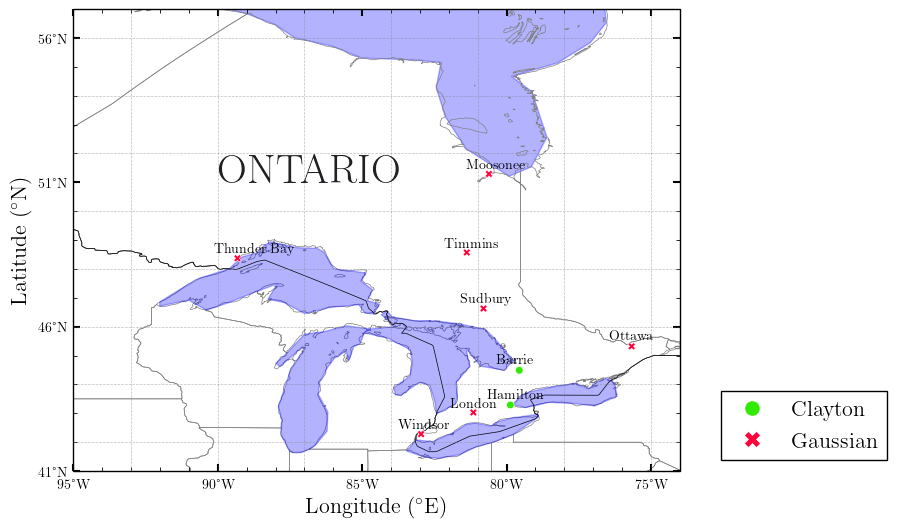

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from adjustText import adjust_text
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader

# 2. Setup Figure with Geographic Projection
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([-95, -74, 41, 57], crs=ccrs.PlateCarree()) # Ontario focus


# 2. Add Longitude and Latitude Gridlines (Coordinate reference)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=False,      # Enables text labels on the axes
    linewidth=0.5, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)

# 2. Set standard Matplotlib Ticks
# Define your tick locations (adjust range/step as needed for your data)
# Syntax: np.arange(start, stop, step)
ax.set_xticks(np.arange(-95, -70, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(41, 60, 5), crs=ccrs.PlateCarree())

# 3. Format them as Coordinates (N/S/E/W)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 4. Enforce Tick Styling
# This ensures they point INWARD and use your Bold settings
ax.tick_params(
    axis='both', 
    which='major', 
    direction='in', 
    length=5, 
    width=1.5, 
    colors='black', 
    top=True, 
    right=True,
    labelsize=10
)

# Optional: Adjust label padding if they are too close to the ticks
ax.tick_params(axis='x', pad=5)
ax.tick_params(axis='y', pad=5)


# Add geographic features for context
# ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='gray', linewidth=0.5)
ax.add_feature(cfeature.LAKES.with_scale('110m'), edgecolor='blue', facecolor='blue', alpha=0.3)
ax.add_feature(cfeature.OCEAN.with_scale('110m'), edgecolor='blue', facecolor='blue', alpha=0.3)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5)
# ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='lightgrey', linewidth=0.5)



# 3. Plot Data
# Use distinct markers + color for B&W accessibility
scatter = sns.scatterplot(
    data=plot_df, x="longitude", y="latitude", 
    hue="best_family", style="best_family", 
    s=30, ax=ax, palette="prism", transform=ccrs.PlateCarree(),
    zorder=5
)

texts = []
t = ax.text(
    -90,51, "ONTARIO", color="#202124",
    transform=ccrs.PlateCarree(), fontsize=30, fontstyle='italic'
)
texts.append(t)
for _, row in plot_df.iterrows():
    t = ax.text(
        row["longitude"]-0.8, row["latitude"]+0.2, row["label"], 
        transform=ccrs.PlateCarree(), fontsize=10, fontweight='bold'
    )
    texts.append(t)

# Formatting axes (Decimal Degrees are standard SI)
ax.set_xlabel(r"Longitude ($^\circ$E)")
ax.set_ylabel(r"Latitude ($^\circ$N)")

# Place legend outside to avoid obscuring data
leg = ax.legend(
    fontsize=16, 
    loc='lower left',           # Anchors the legend's bottom-left to the point below
    bbox_to_anchor=(1.05, 0),   # Placed slightly to the right (1.05) and at the bottom (0)
    markerscale=2
)

# Set the border color to black
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

# 5. Export for Submission
# plt.savefig(save_path+"station_map.pdf", bbox_inches='tight')
plt.show()